Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions.

The codebook can be found [here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import math

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
ess = pd.read_csv('ESSdata_Thinkful.csv')
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [4]:
ess.isnull().mean()*100

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.093088
ppltrst    0.162904
pplfair    0.453805
pplhlp     0.290901
happy      0.360717
sclmeet    0.174540
sclact     1.093786
gndr       0.116360
agea       2.781010
partner    0.197812
dtype: float64

In [5]:
ess.shape

(8594, 13)

In [19]:
# new dataframe with missing values filled in with the mean 
ess1 = ess.copy()
for col in ess1.select_dtypes(include=np.number):
    ess1[col] = ess1[col].fillna(ess1[col].mean())
print(ess1.shape)
ess1.isnull().mean()*100

(8594, 13)


cntry      0.0
idno       0.0
year       0.0
tvtot      0.0
ppltrst    0.0
pplfair    0.0
pplhlp     0.0
happy      0.0
sclmeet    0.0
sclact     0.0
gndr       0.0
agea       0.0
partner    0.0
dtype: float64

In [6]:
# there are missing values but very small amount so can drop
new_ess = ess.dropna()
new_ess.isnull().mean()*100

cntry      0.0
idno       0.0
year       0.0
tvtot      0.0
ppltrst    0.0
pplfair    0.0
pplhlp     0.0
happy      0.0
sclmeet    0.0
sclact     0.0
gndr       0.0
agea       0.0
partner    0.0
dtype: float64

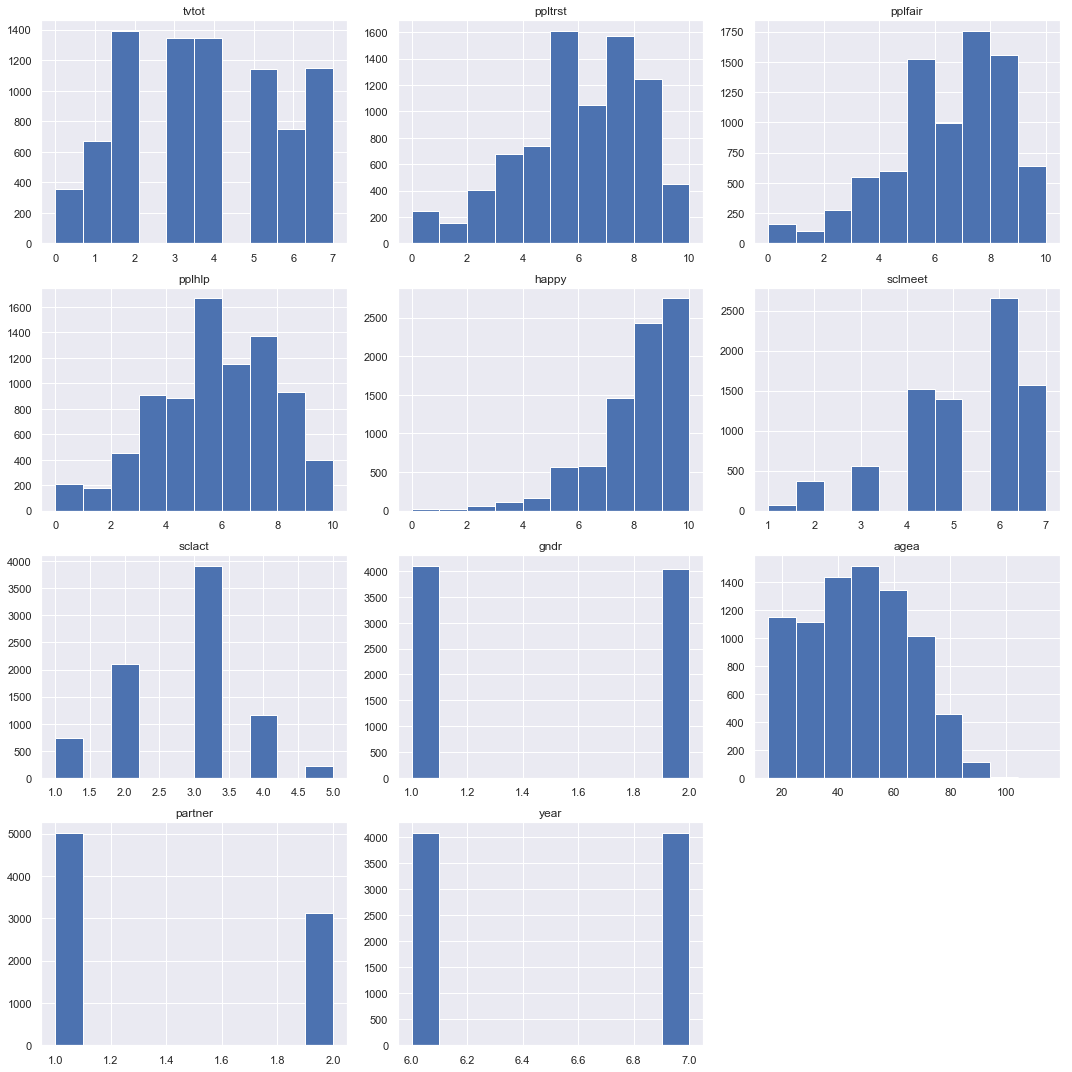

In [7]:
cols = ['tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner', 'year']

plt.figure(figsize=(15,15))

for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    plt.hist(x=cols[i], data=new_ess)
    plt.title(cols[i])
    
plt.tight_layout()
plt.show()

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

First I need to determine whether the variable values are parametric or non-parametric by plotting histograms.

In [8]:
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
new_ess['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

Trust Distribution on 2012 and 2014 for Six European Countries


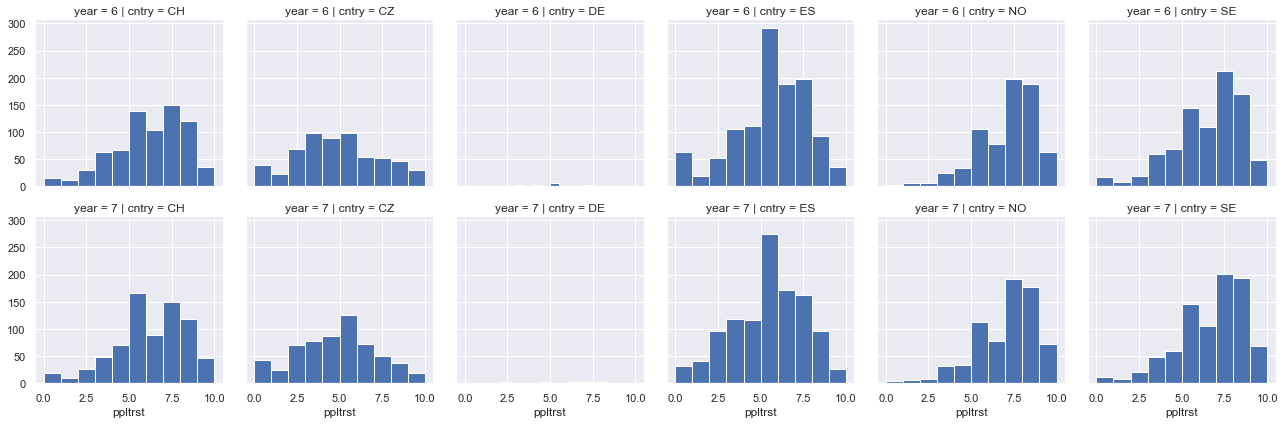

In [10]:
# plot histogram of trust for each country by the year
print('Trust Distribution on 2012 and 2014 for Six European Countries')
g = sns.FacetGrid(new_ess, row='year', col='cntry', sharey=True)
g = g.map(plt.hist, 'ppltrst')
plt.show()

Due to Denmark's small counts, I could barely see its trust distributions on the graphs, especially for the year 2014. Other  graphs look somewhat normally distributed. However, let's check with the Shapiro-Wilk test for normal distribution.

In [11]:
# testing for normality using Shapiro-Wilk test statistic
# value close to 1 indicate the distr is similar to a normal distribution

print('Shapiro-Wilk Test for Normality')
countries = list(new_ess.cntry.unique())
years = [6,7]

for country in countries:
    ind = new_ess[new_ess.cntry == country]
    for year in years:
        print(country, year, shapiro(ind[ind.year==year].ppltrst))
    print()

Shapiro-Wilk Test for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715777039527893, 1.8779569010973773e-09)

DE 6 (0.8929170966148376, 0.1069343090057373)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292042255401611, 7.92943027973029e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



Most of the Shapiro-Wilk test rsults are fairly close to 1, indicating that the distributions are close enough to normal. 
However, Denmark p-value fails at 0.05 threshold; on top of that, given Denmark's small sample size and Shapiro-Wilk test's sensitivity to sample size, I can't trust Denmark's test result.

Given that I'm comparing from the same groups of people and the distributions are non-parametric (due to Denmark), I will use the Wilcoxon signed-rank test to determine if thre are difference over the years

In [12]:
# wilcoxon signed rank test for each country based on years
print('Wilcoxon Signed-Rank Test')
for country in countries:
    ind = ess[ess.cntry==country]
    print(country, wilcoxon(ind[ind.year==6].ppltrst,
                            y=ind[ind.year==7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



C:\Users\vungu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\vungu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [13]:
countries1 = ['CH', 'CZ', 'ES', 'NO', 'SE']
years = [6,7]
# wilcoxon signed rank test for each country based on years
print('T-Test for Paired Samples')
for country in countries1:
    ind = ess[ess.cntry==country]
    print(country, ttest_rel(ind[ind.year==6].ppltrst,
                            ind[ind.year==7].ppltrst))
    print()

T-Test for Paired Samples
CH Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

CZ Ttest_relResult(statistic=nan, pvalue=nan)

ES Ttest_relResult(statistic=nan, pvalue=nan)

NO Ttest_relResult(statistic=nan, pvalue=nan)

SE Ttest_relResult(statistic=nan, pvalue=nan)



C:\Users\vungu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vungu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vungu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [21]:
# wilcoxon signed rank test for each country based on years
print('Wilcoxon Signed-Rank Test')
for country in countries:
    ind = ess1[ess1.cntry==country]
    print(country, wilcoxon(ind[ind.year==6].ppltrst,
                            y=ind[ind.year==7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=85685.5, pvalue=0.7184535748814715)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=244297.5, pvalue=0.007218917203597303)

NO WilcoxonResult(statistic=85798.0, pvalue=0.6848696094352869)

SE WilcoxonResult(statistic=131221.5, pvalue=0.03521571841332836)



In [23]:
# wilcoxon signed rank statistics for Denmark
DE = ess[ess.cntry=='DE']
print('Wilcoxon Test for Denmark')
print(wilcoxon(DE[DE.year==6].ppltrst,
                               y = DE[DE.year==7].ppltrst))

Wilcoxon Test for Denmark
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)


**Spain** and **Sweden** are the only 2 countires that meet the statistical differences in trust for both Wilcoxon and T-Test for Paired Samples with p-values less than 0.05. All other countries fail that threshold. In another words, trust had increased from 2012 to 2014 in Spain and Sweden. 


## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Again, I'll look at the parametric and non-parametric distribution first before running any tests.

Happiness Distribution on 2012 and 2014 for Six European Countries


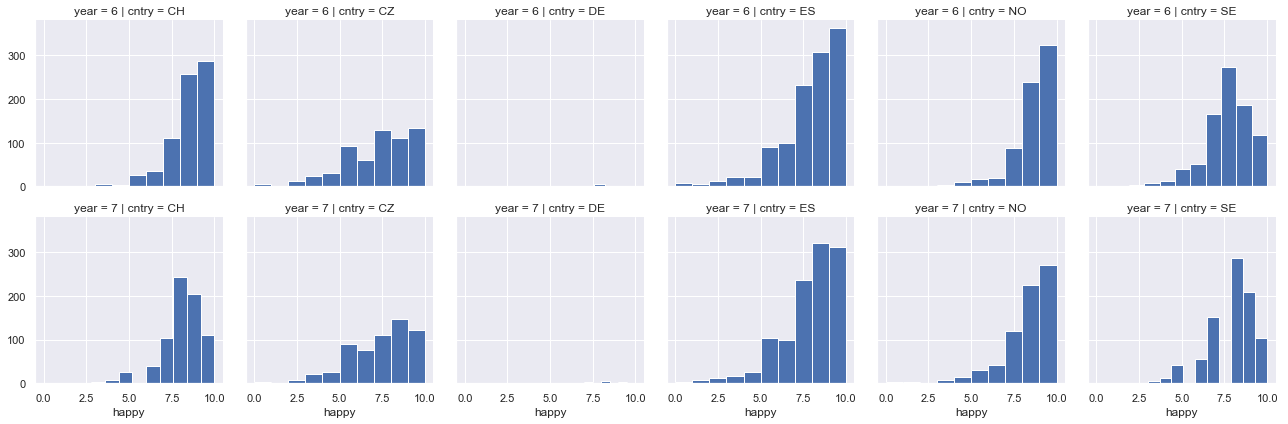

In [24]:
# first plot histogram of happiness
print('Happiness Distribution on 2012 and 2014 for Six European Countries')
g = sns.FacetGrid(new_ess, row='year', col='cntry', sharey=True)
g = g.map(plt.hist, 'happy')
plt.show()

None of the graph looks normally distributed. Anyhow, Shapiro tests will be carried out to make sure:

In [26]:
countries = list(new_ess.cntry.unique())
years = [6,7]
print('Shapiro Test for Normality')
for country in countries:
    ind = new_ess[new_ess.cntry==country]
    for year in years:
        print(country, year, shapiro(ind[ind.year==year].happy))
    print()

Shapiro Test for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.944864809513092, 3.1645106863707403e-14)

DE 6 (0.9160984754562378, 0.22211012244224548)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795286417007446, 4.680781911775775e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.9121034145355225, 5.600535793318595e-22)



The Shapiro scores are surprisingly high given how skewed the histograms look. Again, except for Denmark, all other distributions are close to normal according to the Shapiro test.

I'm going to run both the Wilcoxon test and the T-Test for Paired Samples just to make sure:

In [29]:
# wilcoxon signed rank test for each country based on years
print('Wilcoxon Signed-Rank Test on Original Dataset')
for country in countries:
    ind = ess[ess.cntry==country]
    print(country, wilcoxon(ind[ind.year==6].happy,
                            y=ind[ind.year==7].happy))
    print()

Wilcoxon Signed-Rank Test on Original Dataset
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



In [30]:
# wilcoxon signed rank test for each country based on years
print('Wilcoxon Signed-Rank Test on NAN-filled Dataset')
for country in countries:
    ind = ess1[ess1.cntry==country]
    print(country, wilcoxon(ind[ind.year==6].happy,
                            y=ind[ind.year==7].happy))
    print()

Wilcoxon Signed-Rank Test on NAN-filled Dataset
CH WilcoxonResult(statistic=93199.5, pvalue=0.8908303608327776)

CZ WilcoxonResult(statistic=79039.0, pvalue=0.2756811173565926)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=232720.5, pvalue=0.05979608639061816)

NO WilcoxonResult(statistic=68932.5, pvalue=1.3328464907648905e-05)

SE WilcoxonResult(statistic=126893.0, pvalue=0.6924584472351083)



In [32]:
countries1 = ['CH', 'CZ', 'ES', 'NO', 'SE']
years = [6,7]
# wilcoxon signed rank test for each country based on years
print('T-Test for Paired Samples')
for country in countries1:
    ind = ess1[ess1.cntry==country]
    print(country, ttest_rel(ind[ind.year==6].happy,
                            ind[ind.year==7].happy))
    print()

T-Test for Paired Samples
CH Ttest_relResult(statistic=-0.40611033995248197, pvalue=0.6847740698059911)

CZ Ttest_relResult(statistic=-1.2188654826193317, pvalue=0.22333270273786002)

ES Ttest_relResult(statistic=1.6346389988923788, pvalue=0.10238442986537889)

NO Ttest_relResult(statistic=4.219500306439047, pvalue=2.7568566304770307e-05)

SE Ttest_relResult(statistic=-0.5642634625369061, pvalue=0.5727143461195355)



**Spain**, **Norway**, and **Czech** meet the statistical significance thresholds for Wilcoxon test on the original dataset; however, only **Norway** meets the thresholds on Wilcoxon test on NAN-filled dataset and T-Test for Paired Samples. Norway's happiness also clearly decreased on the histograms. So at this point, I can confidently say that Norway became less happy in 2014 but am still on the fence about Spain and Czech.


## 3. Who reported watching more TV in 2012, men or women?

I'm not comparing dependent samples but independent groups to answer this question. But first, I still need to look at their distribution:

In [38]:
year2012 = ess[ess.year==6]

year2012.gndr.value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

TV Watching Distribution in 2012 between Men vs. Women


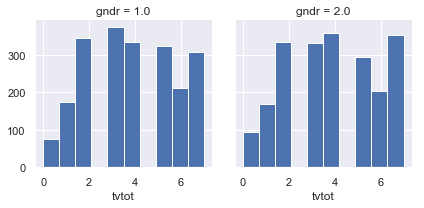

Females (2): (0.9390434622764587, 8.488309331265169e-29)
Males (1): (0.9434293508529663, 5.994494507539187e-28)


In [35]:
print('TV Watching Distribution in 2012 between Men vs. Women')
g = sns.FacetGrid(year2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot')
plt.show()

# shapiro test
print('Females (2):', shapiro(year2012[year2012.gndr==2].tvtot.dropna()))
print('Males (1):', shapiro(year2012[year2012.gndr==1].tvtot.dropna()))

Shapiro results indicate near normal distribution; however, they don't look normally distributed to me so I will apply Wilcoxon Test:

In [39]:
print('Wilcoxon Test for Gender Distribution Regarding TV Watching')
print(wilcoxon(year2012[year2012.gndr==1].tvtot.dropna()[:2140],
               y=year2012[year2012.gndr==2].tvtot.dropna()))

Wilcoxon Test for Gender Distribution Regarding TV Watching
WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


There is no statistical significance in the tv viewership between men and women in the year 2012.


## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Fairness Belief Distribution in 2012 between Single vs. Non-single People


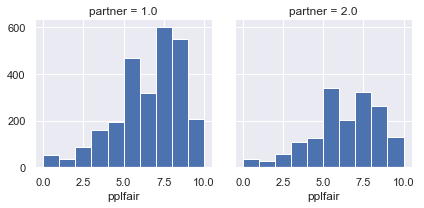

Singles (2): (0.9524076581001282, 8.881730697696138e-26)
Non-singles (1): (0.9414215087890625, 2.4438019138182694e-28)


In [40]:
print('Fairness Belief Distribution in 2012 between Single vs. Non-single People')
g = sns.FacetGrid(year2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair')
plt.show()

# shapiro test
print('Singles (2):', shapiro(year2012[year2012.gndr==2].pplfair.dropna()))
print('Non-singles (1):', shapiro(year2012[year2012.gndr==1].pplfair.dropna()))

The graphs look slightly left-skewed but Shapiro results indicate near normal distribution. I'll use Wilcoxon:

In [41]:
year2012['partner'].value_counts()

1.0    2674
2.0    1616
Name: partner, dtype: int64

In [42]:
print('Wilcoxon Test for Fairness Belief between Singles and Non-Single People')
print(wilcoxon(year2012[year2012.partner==1].pplfair.dropna()[:1608],
               y=year2012[year2012.partner==2].pplfair.dropna()))

Wilcoxon Test for Fairness Belief between Singles and Non-Single People
WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


There is a statistical significance in the difference between single people and non-single people regarding their belief in the fairness of people.


## Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Since I am comparing between different countries, depending on the distribution, if parametric then One-way ANOVA, otherwise, Mood's median or Kruskal-Wallis test will be carried out:

In [51]:
ess.groupby('cntry')['sclmeet'].count()

cntry
CH    1542
CZ    1310
DE      28
ES    2422
NO    1462
SE    1815
Name: sclmeet, dtype: int64

In [52]:
countries = ['CH', 'CZ', 'ES', 'NO']
social = ess[(ess.cntry.isin(countries)) & (ess.year==7)]

Social Meeting Distribution in 2014 for Four European Countries


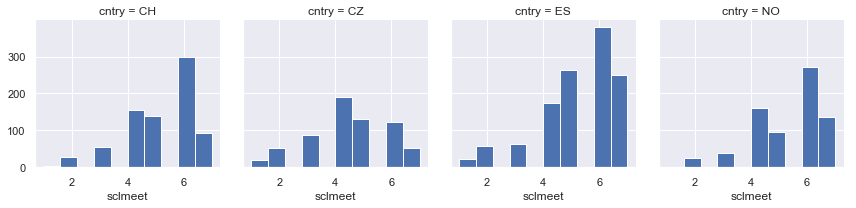

Shapiro Test for Normality
CH (0.8974164724349976, 2.7436334896806913e-22)

CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)



In [54]:
print('Social Meeting Distribution in 2014 for Four European Countries')
g = sns.FacetGrid(social, col='cntry', sharey=True)
g = g.map(plt.hist, 'sclmeet')
plt.show()

print('Shapiro Test for Normality')
for country in countries:
    print(country, shapiro(social[social.cntry==country].sclmeet.dropna()))
    print()

Shapiro results indicate they are all near normal distribution; however, only Czech looks the most normal on the histogram. 

I will use Kruskal-Wallis test in this case:

In [55]:
print('Kruskal-Wallis Test')
print(kruskal(social[social.cntry == 'CH'].sclmeet.dropna(),
              social[social.cntry == 'CZ'].sclmeet.dropna(),
              social[social.cntry == 'ES'].sclmeet.dropna(),
              social[social.cntry == 'NO'].sclmeet.dropna()))

Kruskal-Wallis Test
KruskalResult(statistic=169.44369492694958, pvalue=1.6778868334382967e-36)


Kruskal-Wallis indicates statistical significance in the difference of social meetings between these four countries.

In [56]:
print('CH vs CZ:', ttest_ind(social[social.cntry=='CH'].sclmeet.dropna(),
                             social[social.cntry=='CZ'].sclmeet.dropna()))
print('CH vs ES:', ttest_ind(social[social.cntry=='CH'].sclmeet.dropna(),
                             social[social.cntry=='ES'].sclmeet.dropna()))
print('CH vs NO:', ttest_ind(social[social.cntry=='CH'].sclmeet.dropna(),
                             social[social.cntry=='NO'].sclmeet.dropna()))
print('ES vs CZ:', ttest_ind(social[social.cntry=='ES'].sclmeet.dropna(),
                             social[social.cntry=='CZ'].sclmeet.dropna()))
print('NO vs CZ:', ttest_ind(social[social.cntry=='NO'].sclmeet.dropna(),
                             social[social.cntry=='CZ'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(social[social.cntry=='ES'].sclmeet.dropna(),
                             social[social.cntry=='NO'].sclmeet.dropna()))

CH vs CZ: Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
CH vs ES: Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
CH vs NO: Ttest_indResult(statistic=-2.067962986557216, pvalue=0.03881448528868391)
ES vs CZ: Ttest_indResult(statistic=11.400026538179093, pvalue=3.7676844407353374e-29)
NO vs CZ: Ttest_indResult(statistic=11.269186128577815, pvalue=3.0334022155191707e-28)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)


* Spain and Norway are not significantly different
* Switzerland is significantly different from Czech, Spain, and Norway
* Czech is significantly different from Spain and Norway

## Question 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

This is again the independent varibles problem. I will continue using the same countries in question 5.

Social Acitivities Distribution based on Ages for Four European Countries in 2014


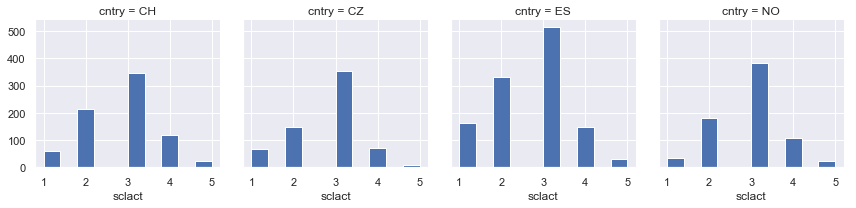

Shapiro Test for Normality
CH (0.8931546211242676, 1.308755961383447e-22)

CZ (0.8517600893974304, 3.2631608025549396e-24)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)



In [57]:
print('Social Acitivities Distribution based on Ages for Four European Countries in 2014')
g = sns.FacetGrid(social, col='cntry', sharey=True)
g = g.map(plt.hist, 'sclact')
plt.show()

print('Shapiro Test for Normality')
for country in countries:
    print(country, shapiro(social[social.cntry==country].sclact.dropna()))
    print()

Shapiro indicates near normal distribution and the histograms also look somewhat normally distributed so I will use the One-Way ANOVA test:

In [71]:
import scipy.stats as stats

print('One-Way ANOVA')
F, p = stats.f_oneway(social[social.cntry == 'CH'].sclact.dropna(),
              social[social.cntry == 'CZ'].sclact.dropna(),
              social[social.cntry == 'ES'].sclact.dropna(),
              social[social.cntry == 'NO'].sclact.dropna())

print(F)
print(p)

One-Way ANOVA
12.296832410640762
5.343654542552198e-08


One-Way ANOVA indicates there are differences in social activities between these four countries. Let's perform pairwise t-tests to compare each group to each other group:

In [72]:
print('CH vs CZ:', ttest_ind(social[social.cntry=='CH'].sclact.dropna(),
                             social[social.cntry=='CZ'].sclact.dropna()))
print('CH vs ES:', ttest_ind(social[social.cntry=='CH'].sclact.dropna(),
                             social[social.cntry=='ES'].sclact.dropna()))
print('CH vs NO:', ttest_ind(social[social.cntry=='CH'].sclact.dropna(),
                             social[social.cntry=='NO'].sclact.dropna()))
print('ES vs CZ:', ttest_ind(social[social.cntry=='ES'].sclact.dropna(),
                             social[social.cntry=='CZ'].sclact.dropna()))
print('NO vs CZ:', ttest_ind(social[social.cntry=='NO'].sclact.dropna(),
                             social[social.cntry=='CZ'].sclact.dropna()))
print('ES vs NO:', ttest_ind(social[social.cntry=='ES'].sclact.dropna(),
                             social[social.cntry=='NO'].sclact.dropna()))

CH vs CZ: Ttest_indResult(statistic=1.665721791943212, pvalue=0.09599050025440872)
CH vs ES: Ttest_indResult(statistic=3.7901178679751157, pvalue=0.00015515309017284228)
CH vs NO: Ttest_indResult(statistic=-1.7137982052307084, pvalue=0.08677322504632268)
ES vs CZ: Ttest_indResult(statistic=-1.9231457887987455, pvalue=0.05461649785517343)
NO vs CZ: Ttest_indResult(statistic=3.44673561169421, pvalue=0.0005844634540645623)
ES vs NO: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)


* Switzerland is not significantly different from Czech and Norway
* Switzerland significantly different from Spain
* Spain is not significantly different from Czech but is significantly different from Norway
* Norway and Czech are significantly different from each other